In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("./acct/database2.db")
df = pd.read_sql_query("select * from form4Head;", conn)
df

,accNum,headId,rowNumber,documentType,publicDocCount,periodOfReport,filedDate,changedDate,schemaVersion,dateOfOriginalSubmission,...,rptOwnerStateDescription,rptOwnerMailStreet1,rptOwnerMailStreet2,rptOwnerMailCity,rptOwnerMailState,rptOwnerMailZip,rptOwnerisDirector,rptOwnerisOfficer,rptOwnerisTenPercentOwner,rptOwnerisOther
0,66740/000112760217004862/0001127602-17-004862,66740/000112760217004862/0001127602-17-004862-1,1,4/A,1,2017-02-07,20170209,20170209,X0306,20170209,...,,3M COMPANY - OFFICE OF GENERAL COUNSEL,3M CENTER,ST. PAUL,MN,55144-1000,0,1,0,0
1,1498132/000002547517000026/0000025475-17-000026,1498132/000002547517000026/0000025475-17-000026-1,1,4/A,1,2016-12-31,20170111,20170111,X0306,20170103,...,,"3700 MANSELL ROAD, #220",None,ALPHARETTA,GA,30022,1,1,0,0
2,927003/000120919117032230/0001209191-17-032230,927003/000120919117032230/0001209191-17-032230-1,1,4/A,1,2017-05-10,20170515,20170515,X0306,20170511,...,,1625 SHARP POINT DRIVE,None,FORT COLLINS,CO,80525,1,1,0,0
3,893739/000121102217000006/0001211022-17-000006,893739/000121102217000006/0001211022-17-000006-1,1,4/A,2,2017-03-24,20170329,20170329,X0306,20170327,...,,111 WEST 57TH STREET,SUITE 1100,NEW YORK,NY,10019,1,1,0,0
4,66740/000112760217004878/0001127602-17-004878,66740/000112760217004878/0001127602-17-004878-1,1,4/A,1,2017-02-07,20170209,20170209,X0306,20170209,...,,3M CENTER (OGC),None,ST. PAUL,MN,55144-1000,0,1,0,0
5,1305168/000089924317006824/0000899243-17-006824,1305168/000089924317006824/0000899243-17-006824-1,1,4/A,1,2017-02-16,20170308,20170308,X0306,20170221,...,,C/O AMERICAN REPROGRAPHICS COMPANY,"700 NORTH CENTRAL AVENUE, SUITE 550",GLENDALE,CA,91203,1,1,0,0
6,1708881/000110465917052970/0001104659-17-052970,1708881/000110465917052970/0001104659-17-052970-1,1,4/A,1,2017-08-16,20170821,20170821,X0306,20170818,...,,"800 GESSNER, SUITE 1000",SUITE 1000,HOUSTON,TX,77024,1,0,0,0
7,899051/000112760217034686/0001127602-17-034686,899051/000112760217034686/0001127602-17-034686-1,1,4/A,1,2017-06-01,20171214,20171214,X0306,20170605,...,,2775 SANDERS ROAD,None,NORTHBROOK,IL,60062-7127,1,0,0,0
8,881890/000114036117019447/0001140361-17-019447,881890/000114036117019447/0001140361-17-019447-1,1,4/A,1,2017-05-01,20170510,20170510,X0306,20170501,...,,"C/O ABAXIS INC, 3240 WHIPPLE ROAD",None,UNION CITY,CA,94587,0,1,0,0
9,949858/000120919117052375/0001209191-17-052375,949858/000120919117052375/0001209191-17-052375-1,1,4/A,1,2017-08-01,20170912,20170912,X0306,20170803,...,,19820 NORTH CREEK PARKWAY,SUITE 201,BOTHELL,WA,98011,0,1,0,0


In [2]:
df2 = df.copy()
df2.columns

Index(['accNum', 'headId', 'rowNumber', 'documentType', 'publicDocCount',
       'periodOfReport', 'filedDate', 'changedDate', 'schemaVersion',
       'dateOfOriginalSubmission', 'notSubjectToSection16', 'issuerName',
       'issuerCik', 'issuerIndustrialClassification', 'issuerIrs',
       'issuerIncorpState', 'issuerFiscalYrEnd', 'issuerBusinessStreet1',
       'issuerBusinessCity', 'issuerBusinessState', 'issuerBusinessZip',
       'issuerBusinessPhone', 'issuerMailStreet1', 'issuerMailStreet2',
       'issuerMailCity', 'issuerMailState', 'issuerMailZip',
       'issuerTradingSymbol', 'rptOwnerName', 'rptOwnerCik',
       'rptOwnerFormType', 'rptOwnerSecAct', 'rptOwnerSecFileNum',
       'rptOwnerFilmNum', 'rptOwnerBusinessPhone', 'rptOwnerStreet1',
       'rptOwnerStreet2', 'rptOwnerCity', 'rptOwnerState', 'rptOwnerZipCode',
       'rptOwnerStateDescription', 'rptOwnerMailStreet1',
       'rptOwnerMailStreet2', 'rptOwnerMailCity', 'rptOwnerMailState',
       'rptOwnerMailZip', 'rpt

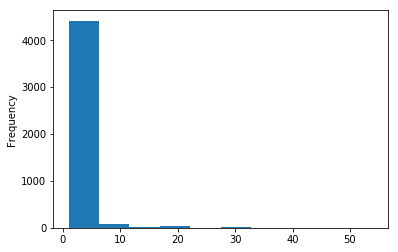

In [5]:
# number of files by same rptOwner is left skewed
# prob can just match base on rptOwner
grouped = df2.groupby(['rptOwnerName'])
sizes = grouped.size()
sizes.plot('hist', label=True)

In [6]:
# stats
sizes.describe()

count    4567.000000
mean        2.306328
std         2.914328
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        54.000000
dtype: float64

In [7]:
# sorted
sizes.sort_values(ascending=False).head(20)

rptOwnerName
ADVENT INTERNATIONAL CORP/MA         54
ACCESS INDUSTRIES MANAGEMENT, LLC    30
AI Altep Holdings, Inc               30
RSB 2 Ltd                            30
AI New Holdings 2 LLC                30
ADVENT INTERNATIONAL GPE VI-G LP     30
ADVENT INTERNATIONAL GPE VI-E LP     30
ADVENT INTERNATIONAL LLC             30
ALTEP 2014 L.P.                      30
ADVENT INTERNATIONAL GPE VI-D LP     30
ALTEP 2010 L.P.                      30
ADVENT INTERNATIONAL GPE VI-C LP     30
ALTEP 2011 L.P.                      30
ADVENT INTERNATIONAL GPE VI-B LP     30
ADVENT INTERNATIONAL GPE VI-A LP     30
ADVENT INTERNATIONAL GPE VI LP       30
Blavatnik Len                        30
ADVENT INTERNATIONAL GPE VI-F LP     30
RAVICH JESS M                        22
Swenson Nicholas John                22
dtype: int64

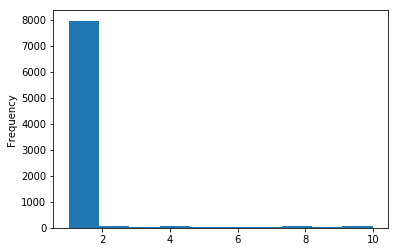

In [8]:
# number of files w same reportOwner is left skewed
grouped = df2.groupby(['accNum'])
sizes = grouped.size()
sizes.plot('hist', label=True)

In [9]:
sizes.describe()

count    8401.000000
mean        1.253779
std         1.236592
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
dtype: float64

In [10]:
sizes.sort_values(ascending=False).head(20)

accNum
1034196/0001209191-17-013596                       10
1432552/0001209191-17-022496                       10
1430922/0001209191-17-022496                       10
1430923/0001209191-17-013596                       10
1432552/0001209191-17-013596                       10
1430923/0001209191-17-020714                       10
1430923/0001209191-17-022496                       10
1704525/000110465917026605/0001104659-17-026605    10
1430925/0001209191-17-013596                       10
1667354/000110465917026605/0001104659-17-026605    10
1432552/0001209191-17-020714                       10
1192887/0000899243-17-005133                       10
1430925/0001209191-17-020714                       10
1192887/0000899243-17-003893                       10
1430925/0001209191-17-022496                       10
1430926/0001209191-17-013596                       10
1430926/0001209191-17-020714                       10
1430919/0001209191-17-013596                       10
1669792/0001209191-17